# Model

## Importing Data

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_pickle("scout_for_model.pkl")

In [3]:
df.shape

(8979, 150)

In [4]:
df.select_dtypes(exclude="number").columns

Index(['first_registration'], dtype='object')

In [5]:
df.drop('first_registration', axis=1, inplace=True)

In [6]:
df.head()

,co2_emission,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,...,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,99.0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,129.0,1798.0,141.0,80000.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,99.0,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,99.0,1422.0,66.0,73000.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.8,0,14500,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,4.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,109.0,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


## Initial Model for Feature Selection

In [7]:
# Create features and target (df)
X = df.drop('price', axis = 1) # features
y = df['price'] # target

In [8]:
# # Create features and target (array)
# X = df.drop('price', axis = 1).values # features
# y = df['price'].values # target

In [9]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

### Lasso

In [29]:
# Create Alphas, and lists to store scores
alpha_space = np.linspace(0.1, 10)
lasso_scores = []

# Create a regressor
lasso_ = Lasso(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify alpha
    lasso_.alpha = alpha
    
    # Perfrom 5-fold CV
    lasso_cv_scores = cross_val_score(lasso_, X_train, y_train, cv=5)
    
    # Append the mean and std to the lists
    lasso_scores.append(np.mean(lasso_cv_scores))

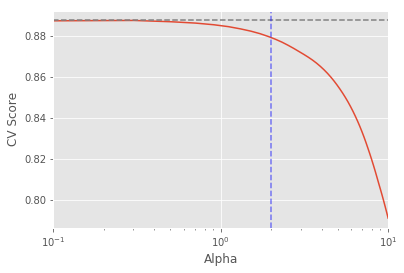

In [32]:
# Create a function to display how cv scores changes with alphas
def display_plot(cv_scores):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    ax.set_ylabel('CV Score')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    ax.axvline(x=2, c='b', linestyle='--', alpha=0.5)
    plt.show()
    
display_plot(lasso_scores)

$alpha = 2$ seems to be a good choice

In [33]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 2, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

R^2: 0.874


In [34]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lasso, X_test, y_test, cv=5)

print("Average 5-Fold CV Score: {0:.3f}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.880


In [36]:
# Create features DataFrame
df_features = df.drop('price', axis = 1)

# Join feature names and coefficients
feature_coef = pd.DataFrame({'features' : df_features.columns, 'coef' : lasso_coef})

In [37]:
# Select only significant features (features with parameters != 0)
significants = feature_coef.loc[feature_coef.coef != 0, :]
len(significants)

36

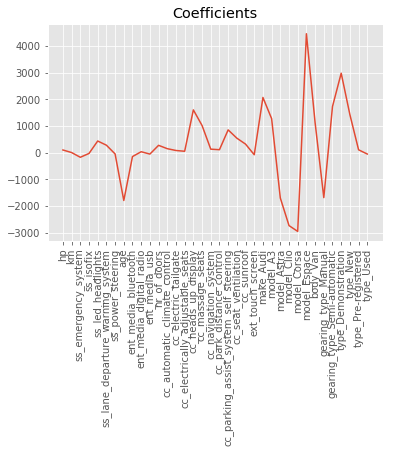

In [40]:
# Plot significant features with parameter values
plt.plot(range(len(significants)), significants.coef)
plt.xticks(range(len(significants)), significants.features, rotation=90)
plt.title('Coefficients')
plt.margins(0.05)
plt.show()

In [41]:
# Print Significant features with coefficients
feature_coef.loc[feature_coef.coef != 0, :].sort_values(by='coef')

,features,coef
111,model_Corsa,-2958.966126
110,model_Clio,-2740.469318
35,age,-1798.189947
109,model_Astra,-1705.804879
138,gearing_type_Manual,-1690.392945
16,ss_emergency_system,-177.421643
36,ent_media_bluetooth,-150.122793
99,ext_touch_screen,-81.674597
45,ent_media_usb,-57.729872
147,type_Used,-55.683612


The most significant factors appear to be:
 - Model
 - Make
 - Type
 - Age
 - Gearing type (manuel, automatic, semi-automatic)
 - cc_, ss_, ent_, ext_
 - Body
 - hp
 - Nr.of Doors
 - km
 
????Normalize ettigimiz icin yukaridaki degerleri, significance level (feature importance level) olarak da alabilir miyiz?

## Model